In [1]:
import numpy as np
import matplotlib.pyplot as plt

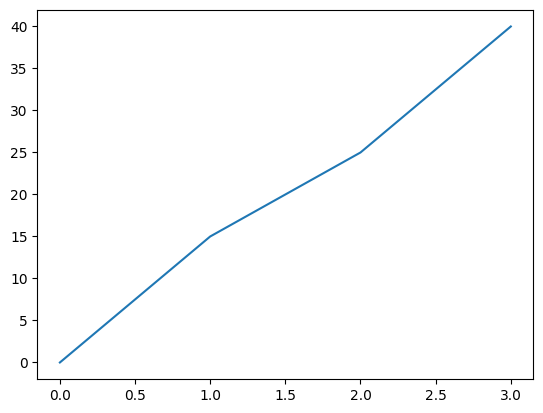

In [2]:
time = [0, 1, 2, 3]
distance = [0, 15, 25, 40]
_ = plt.plot(time, distance)

Positive slope means increasing line

Negative slope means decreasing line

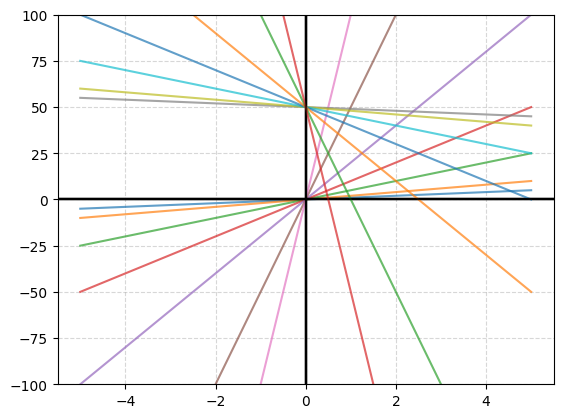

In [3]:
x = np.linspace(-5, 5, 100)

lines = [
    (1, 0),
    (2, 0),
    (5, 0),
    (10, 0),
    (20, 0),
    (50, 0),
    (100, 0),

    (-1, 50),
    (-2, 50),
    (-5, 50),
    (-10, 50),
    (-20, 50),
    (-50, 50),
    (-100, 50),
]

for slope, intercept in lines:
  y = (slope * x) + intercept
  _ = plt.plot(x, y, label=f'y = {slope}x  + {intercept}', alpha=0.7)
  _ = plt.axhline(0, color='black', alpha=0.5)
  _ = plt.axvline(0, color='black', alpha=0.5)
  _ = plt.grid(True, linestyle='--', alpha=0.5)
  _ = plt.ylim(-100, 100)
  # _ = plt.legend()

In [4]:
time = np.array([0, 1, 2, 3, 4, 5, 6, 7])
distance = np.array([0, 35, 70, 85, 120, 150, 190, 250])

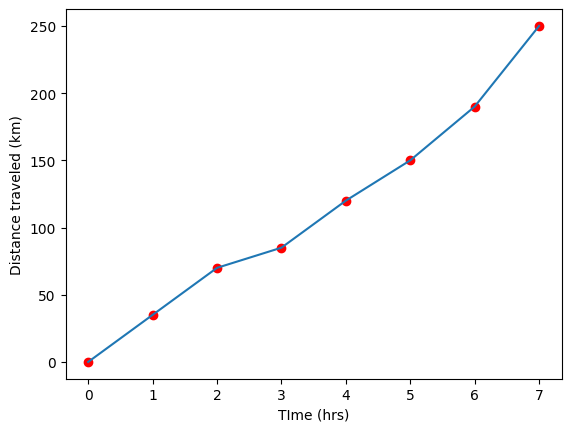

In [5]:
_ = plt.plot(time, distance)
_ = plt.scatter(time, distance, color='red')
_ = plt.xlabel('TIme (hrs)')
_ = plt.ylabel('Distance traveled (km)')

For line segment b/w sample 0 and 1
  m=35.0, b=0.0
For line segment b/w sample 1 and 2
  m=35.0, b=0.0
For line segment b/w sample 2 and 3
  m=15.0, b=40.0
For line segment b/w sample 3 and 4
  m=35.0, b=-20.0
For line segment b/w sample 4 and 5
  m=30.0, b=0.0
For line segment b/w sample 5 and 6
  m=40.0, b=-50.0
For line segment b/w sample 6 and 7
  m=60.0, b=-170.0


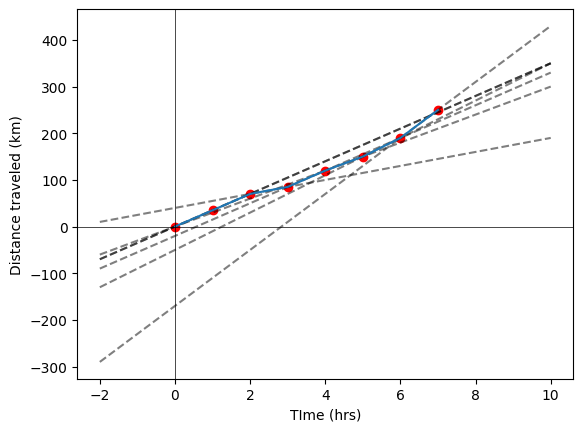

In [6]:
for i in range(len(time) - 1):
  x1, y1 = time[i], distance[i]
  x2, y2 = time[i+1], distance[i+1]
  print(f'For line segment b/w sample {i} and {i+1}')

  slope = (y2 - y1) / (x2 - x1)
  intercept = y1 - (slope * x1)
  print(f'  m={slope}, b={intercept}')

  x = np.linspace(-2, 10, 100)
  y = (slope * x) + intercept
  _ = plt.plot(x, y, color='black', linestyle='--', alpha=0.5)

_ = plt.plot(time, distance)
_ = plt.scatter(time, distance, color='red')
_ = plt.xlabel('TIme (hrs)')
_ = plt.ylabel('Distance traveled (km)')
_ = plt.axhline(0, color='black', linewidth=0.5)
_ = plt.axvline(0, color='black', linewidth=0.5)

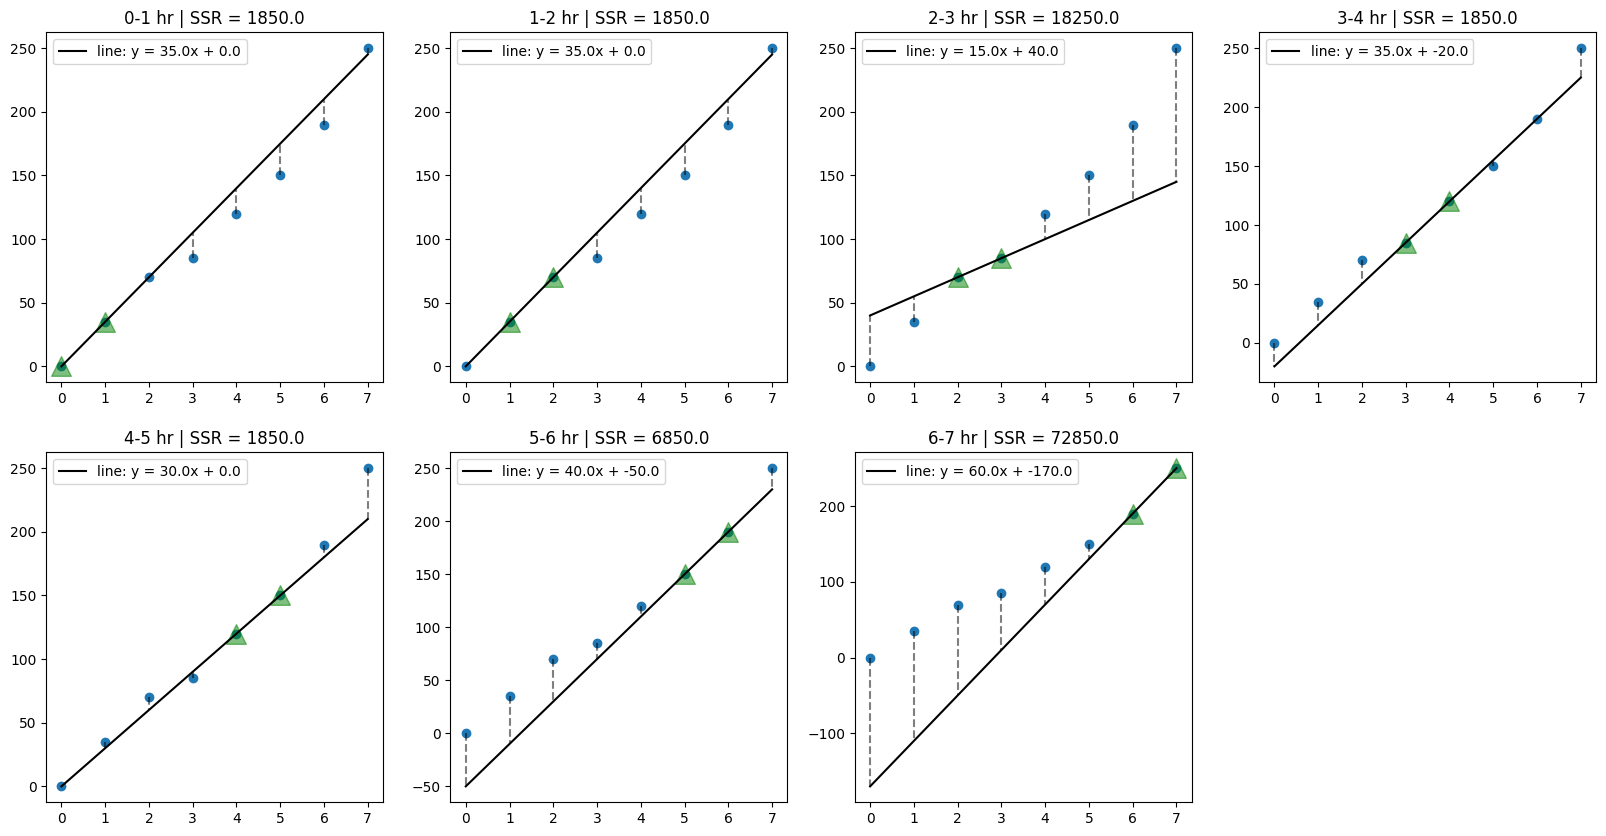

In [7]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i in range(len(time) - 1):
  x1, y1 = time[i], distance[i]
  x2, y2 = time[i+1], distance[i+1]

  slope = (y2 - y1) / (x2 - x1)
  intercept = y1 - (slope * x1)

  distance_pred = (slope * time) + intercept
  ssr = np.sum((distance - distance_pred)**2)

  _ = axes[i].plot(time, distance_pred, color='black', label=f'line: y = {slope}x + {intercept}')
  _ = axes[i].scatter(time, distance)
  _ = axes[i].scatter([x1, x2], [y1, y2], color='green', marker='^', s=200, alpha=0.5)
  _ = axes[i].vlines(time, distance, distance_pred, color='black', linestyle='--', alpha=0.5)
  _ = axes[i].set_title(f'{x1}-{x2} hr | SSR = {ssr}')
  _ = axes[i].legend()

for j in range(i+1, len(axes)):
  fig.delaxes(axes[j])

### Find best fit using OLS

In [8]:
x = time
y = distance

numerator = np.sum((x-x.mean()) * (y-y.mean()))
denominator = np.sum((x-x.mean())**2)

m = numerator / denominator
b = y.mean() - m * x.mean()
y_pred = m*x + b
ssr = np.sum((y - y_pred)**2)

print(f'slope {m:.2f}')
print(f'intercept {b:.2f}')
print(f'ssr {ssr:.2f}')

slope 33.33
intercept -4.17
ssr 933.33


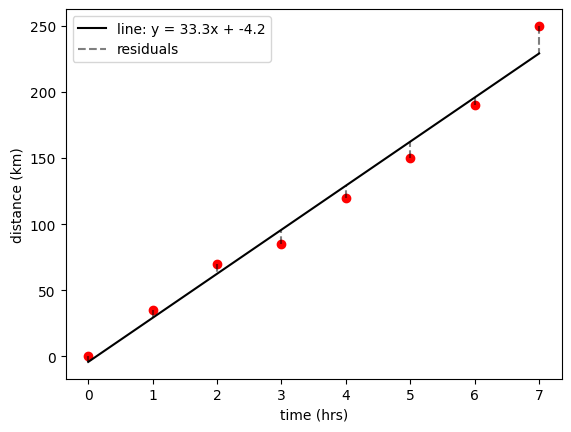

In [9]:
_ = plt.scatter(x, y, color='red')
_ = plt.plot(x, y_pred, color='black', label=f'line: y = {m:.1f}x + {b:.1f}')
_ = plt.vlines(x, y, y_pred, color='black', linestyle='--', alpha=0.5, label='residuals')
_ = plt.xlabel('time (hrs)')
_ = plt.ylabel('distance (km)')
_ = plt.legend()